<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Crop_Yield_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn import metrics
from warnings import filterwarnings
filterwarnings('ignore')

DATA EXTRACTION

---

In [13]:
crop = pd.read_csv(f"E:\Projects\Machine Learning Projects\Raw Data\Regression\crop_yield_data.csv")
crop.head(2), crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


(   rainfall_mm  soil_quality_index  farm_size_hectares  sunlight_hours  \
 0         1626                   9                 636              11   
 1         1959                   9                  73              11   
 
    fertilizer_kg  crop_yield  
 0           1006         404  
 1            112         115  ,
 None)

DATA ANALYSIS

---

In [14]:
sns.set()

In [15]:
def plot(data, x, y=None, style='hist'):
    plt.figure(figsize=(10, 5))
    if style=='hist':
        sns.histplot(data[x], kde=True, kde_kws=dict(cut=3))
    elif style=='scatter':
        sns.scatterplot(data=data, x=x, y=y)
    else:
        raise ValueError("style unacceptable")
    plt.show()

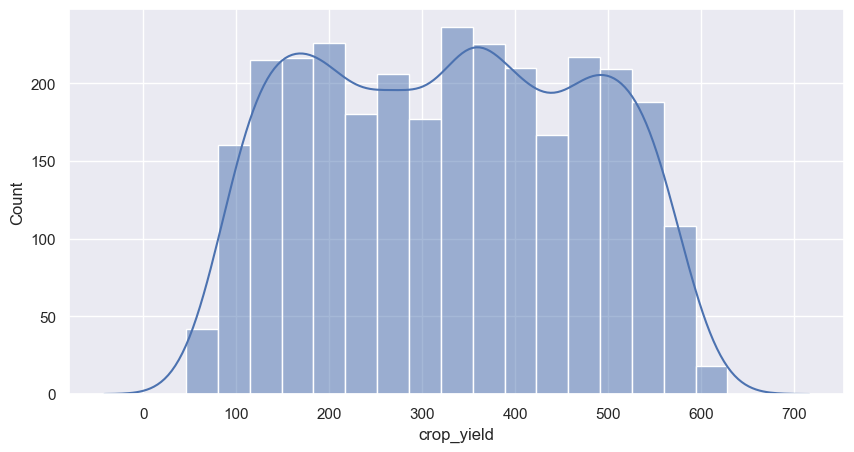

In [16]:
plot(crop, x='crop_yield', style='hist')

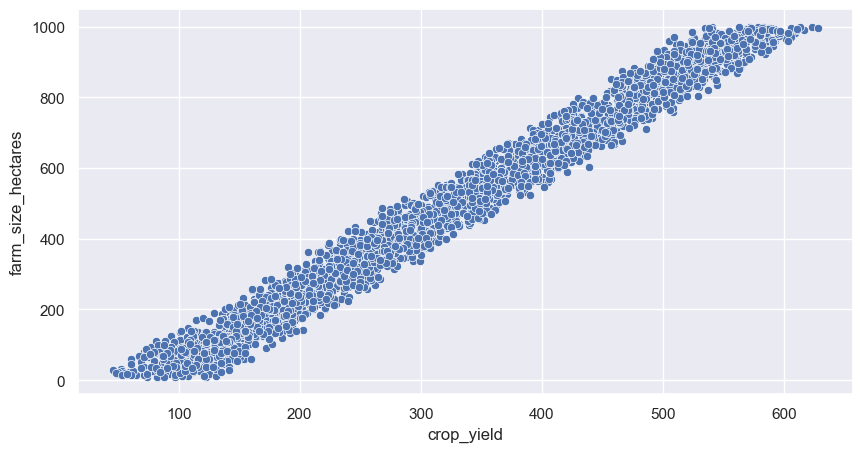

In [17]:
plot(crop, x='crop_yield',y='farm_size_hectares', style='scatter')

MACHINE LEARNING MODEL

In [18]:
X = crop.drop(columns=['crop_yield'])
y = crop['crop_yield']

sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:12<00:00,  3.40it/s]

XGBRegressor model failed to execute
'super' object has no attribute '__sklearn_tags__'
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 5
[LightGBM] [Info] Start training from score 328.087083


In [21]:
models.head()

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SGDRegressor,1.00,1.00,0.29,0.02
RidgeCV,1.00,1.00,0.29,0.02
BayesianRidge,1.00,1.00,0.29,0.06
OrthogonalMatchingPursuitCV,1.00,1.00,0.29,0.03
Lars,1.00,1.00,0.29,0.02


In [22]:
from sklearn.linear_model import SGDRegressor
rg = SGDRegressor(max_iter=1000, tol=1e-3)
rg.fit(X_train, y_train)

SGDRegressor()

MODEL EVALUATION

---

In [24]:
r2_scr = metrics.r2_score(y_test, rg.predict(X_test))
print(f"R2 score for test is {r2_scr*100:.2f}%")

R2 score for test is 100.00%
